<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Bivariate Analysis</h1>
</div>

“Bi” means “two” and "variate" means variable, Hence it's the analysis of 2 variables. 

The main goal of bivariate analysis is to find relationship between two variables in the data.

## Content:
- Correlation and Correlation Test
- Chi-Squared Test
- ANOVA

#### Import the Automobile Data

In [13]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/Automobile_data.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [15]:
df['price'] = df['price'].replace("?", np.nan)
df = df.dropna()
df['price'] = df['price'].astype(int)

df['horsepower'] = df['horsepower'].replace("?", np.nan)
df = df.dropna()
df['horsepower'] = df['horsepower'].astype(int)

#code to check if there any na values in any column
df[df.isna().any(axis=1)]

df



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Correlation and Correlation Test</h2>
</div>

Correlation is the statitistical measure of the strength of linear relationship between 2 variables. In other words it describes how are 2 variables moving with each other.

The value of correlation coffecients ranges from -1 to 1. 
- -1 states that the variables move in the opposite direction with the same intensity
- 0 states that the variables don't have any relationship
- 1 states that the varaibles move in the same direction with the same intensity

There are various types of correlations. The most important one is pearson correlation.

#### Pearson Correlation Coefficient

$$r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

#### Linear Correlation Coefficient

At lots of places you might see the below given formula for correlation

$$r = \frac{{}\sum x y - \sum x \sum y}
{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}$$


While computing the correlation, you can compute the associated p-value as well to check the statistical significane of the correlation test.

**Null hypothesis (H0):** There is no relation between the variables. 

**Alternate hypothesis (H1):** There is a statistical significant relation between the two variables.


Let's compute the correlation coeffiecient between 'horsepower' and 'price' features. 

In [16]:
# Pearson's correlation
!pip install scipy
from scipy.stats import pearsonr

?pearsonr

In [17]:
# calculate Pearson's correlation

corr, _ = pearsonr(df['horsepower'].astype(float), df['price'])
print('Pearsons correlation:%.3f'%corr)
print('p-value: ', _)

Pearsons correlation:0.811
p-value:  1.1891278276945887e-47


In [18]:
# calculate Pearson's correlation between Y variable and df['city-mpg']

corr, _ = pearsonr(df['engine-size'].astype(float), df['price'])
print('Pearsons correlation:%.3f'%corr)
print('p-value: ', _)

Pearsons correlation:0.874
p-value:  1.2650674479074058e-63


In [19]:
# calculate Spearman's correlation
from scipy.stats import spearmanr

corr, _ = spearmanr(df['horsepower'].astype(float), df['price'])
print('Spearman correlation: %.3f' % corr)
print('p-value: ', _)

Spearman correlation: 0.851
p-value:  7.004940332945711e-57


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Chi Squre Test</h2>
</div>

Chi-squared test is used to test if two categorical variables are dependent, by means of a contingency table.

**Null hypothesis (H0):** There is no relation between the categorical variables. 

**Alternate hypothesis (H1):** There is a statistical significant relation between the two categorical variables.

Let's check if 'sex' and 'Survived' features are dependent. 

In [20]:
titanic_df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Chi Squre test
from scipy.stats import chi2_contingency

?chi2_contingency

In [22]:
# Let's compute the contingency table
observedFrequency = pd.crosstab(titanic_df['Sex'], titanic_df['Survived'].astype('category'))
observedFrequency

Survived,0,1
Sex,,
female,81,233
male,468,109


In [23]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [25]:
# Chi-square stat , p-value, degrees of freedom, expected frequencies
stat, p, dof, expected = chi2_contingency(observedFrequency)
print('chisquared=%.5f,   p-value=%.5f, dof=%.2f' % (stat, p,dof))
print (expected)
observedFrequency

chisquared=260.71702,   p-value=0.00000, dof=1.00
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


Survived,0,1
Sex,,
female,81,233
male,468,109


In [26]:
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.1973570627755645e-58
Dependent (reject H0)


In [27]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [28]:
observedFrequency_pclass=pd.crosstab(titanic_df['Survived'],titanic_df['Pclass'].astype('category'))
observedFrequency_pclass

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [29]:
stat,p_pclass,dof,expectedfrequency_pclass = chi2_contingency(observedFrequency_pclass)
print (f'p-value is {p_pclass:.23f} and dof is {dof}')
print(expectedfrequency_pclass)
observedFrequency_pclass

p-value is 0.00000000000000000000005 and dof is 2
[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [30]:
alpha =0.05
print(f' p-value is {str(p)}')
if p_pclass <= alpha:
    print("Reject H0 - there is a statistically significant relation between pclass and survived")
else:
    print("Reject H1 - no relation between variables")

 p-value is 1.1973570627755645e-58
Reject H0 - there is a statistically significant relation between pclass and survived


As the p value is less than the significance level, you can reject the H0. The two variables are related. 

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. ANOVA Test</h2>
</div>

Anova test is used to test if two groups have statistically significantly different means. There are 3 types of ANOVA test.

- One-way ANOVA
- Two-way ANOVA
- MANOVA

Most of the time, One-way ANOVA is used. Let's understand One-way ANOVA in detail

**Null hypothesis (H0):** The mean of two groups is same.

**Alternate hypothesis (H1):** The mean of two groups is different.

Let's check if mean age is the same for people who survived and people who didn't survive. In other words, the aim is to check if 'age' has any impact on the chances of person being saved

In [31]:
#titanic_df = pd.read_csv("Datasets/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### ANOVA with scipy.stats api

In [32]:
# f_oneway
from scipy.stats import f_oneway
import scipy.stats as stats
import matplotlib.pyplot as plt
?f_oneway

,Survived,Age
0,0,424
1,1,290


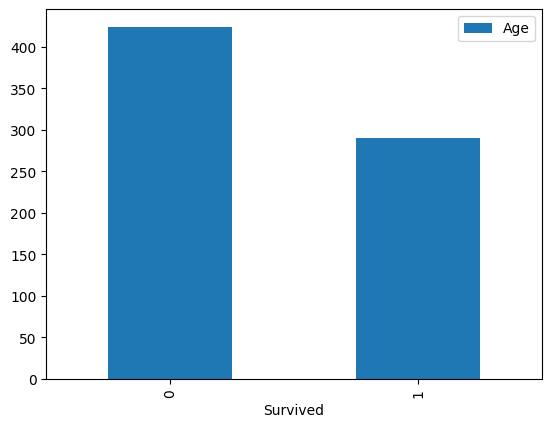

In [44]:
observedfre=pd.crosstab(titanic_df['Age'],titanic_df['Survived'].astype('category'))
observedfre

observedFrequency_pclass=pd.crosstab(titanic_df['Survived'],titanic_df['Age'].astype('category'))
observedFrequency_pclass
sample_df=titanic_df[['Survived','Age']]
group= sample_df.groupby(['Survived']).count().reset_index()
group.plot(kind='bar',x='Survived',y='Age')

group

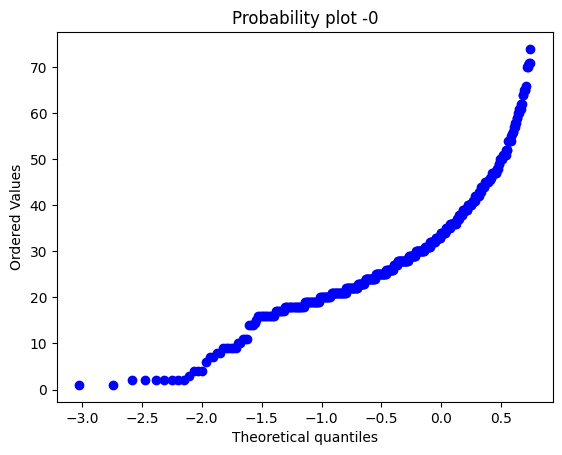

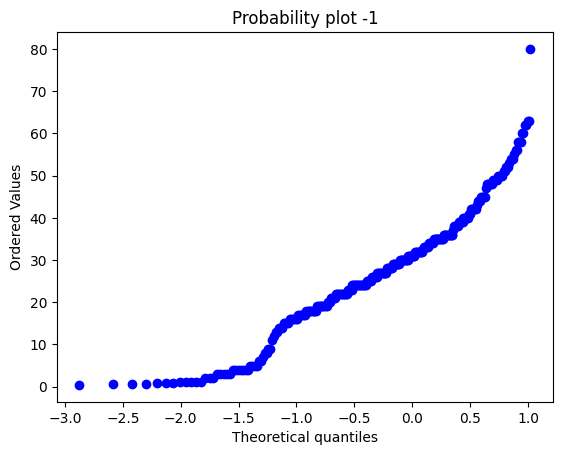

In [43]:
#we check if the assumptions for the one-way ANOVA hypothesis test are fulfilled. The samples are random and independent samples. Now, we check the normality assumption by plotting a normal probability plot (Q-Q plots) for each grouped variable.

unique_survived= sample_df['Survived'].unique()

for survived in unique_survived:
    stats.probplot(sample_df[sample_df['Survived']==survived]['Age'],plot=plt,dist='norm')
    plt.title("Probability plot -" + str(survived))
    plt.show()

In [34]:
# significance value
alpha = 0.05

# Get F and p value
F, p = f_oneway(titanic_df[titanic_df.Survived == 1]['Age'].dropna(),
                titanic_df[titanic_df.Survived == 0]['Age'].dropna())

# Determine whether to reject or keep null hypothesis
print('F-statistic=%.5f, p=%.5f' % (F, p))



F-statistic=4.27119, p=0.03912


In [35]:
# interpret p-value
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

Dependent (reject H0)


As the p value is less than the significance level, you can reject the H0. The two groups are different. 

#### ANOVA with statsmodels api

In [42]:
!pip install statsmodels

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
?model

Fit ANOVA model

In [37]:
model = ols('Age ~ C(Survived)', titanic_df).fit()
print(f"Overall model F({model.df_model: .0f}, {model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# ANOVA table
res = sm.stats.anova_lm(model, typ=2)
res

Overall model F( 1,  712) =  4.271, p =  0.0391


,sum_sq,df,F,PR(>F)
C(Survived),897.187582,1.0,4.271195,0.039125
Residual,149559.448362,712.0,NaN,NaN


As the p value is less than the significance level, you can reject the H0. The two groups are different. 